## 1. Loading the dataset

In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\HP\\Downloads\\datasets')

In [2]:
#importing essential libraries
import numpy as np
import pandas as pd

In [3]:
#loading the dataset
original_data = pd.read_csv('IBM HR Attrition Data.csv')

## 2. Understanding the data structure

In [4]:
#let's look at it blue print 
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Great! No null values are there. There are 34 features(excluding Target: Attrition), out of which 8 are categorical and rest are continous variables. Total of 1470 feature vectors or instances are present in the dataset. That's not quite a lot, but fine enough to get started.

In [5]:
#sliding the target column to the last of the dataframe
add_to_last = original_data[['Attrition']]
original_data.drop('Attrition', axis=1, inplace=True)
original_data['Attrition'] = add_to_last

In [6]:
#let's look at the stats for the data
original_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


So , the data doesn't looks scaled at all. 

In [7]:
#our labels are in categorical form, i would rather prefer them to be in binary form in some of the cases. This would help
#correlate them better with numerical variables. So let's add a target column which is just binary form of Attrition.
#this would just be for EDA purpose, i will remove it later
original_data_copy = original_data.copy()
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder(dtype='int64')
original_data["Attrition label"] = encode.fit_transform(original_data[['Attrition']])

In [8]:
#since our data has lot of categorical values and let's separate the continous variables from 
#categorical ones to ease to process of interpretation and preprocessing.
data_num = original_data.select_dtypes(include='int64')
data_cat = original_data.select_dtypes(include='object')
print(data_num.shape, data_cat.shape)

(1470, 27) (1470, 9)


## 3. Exploratory Data Analysis

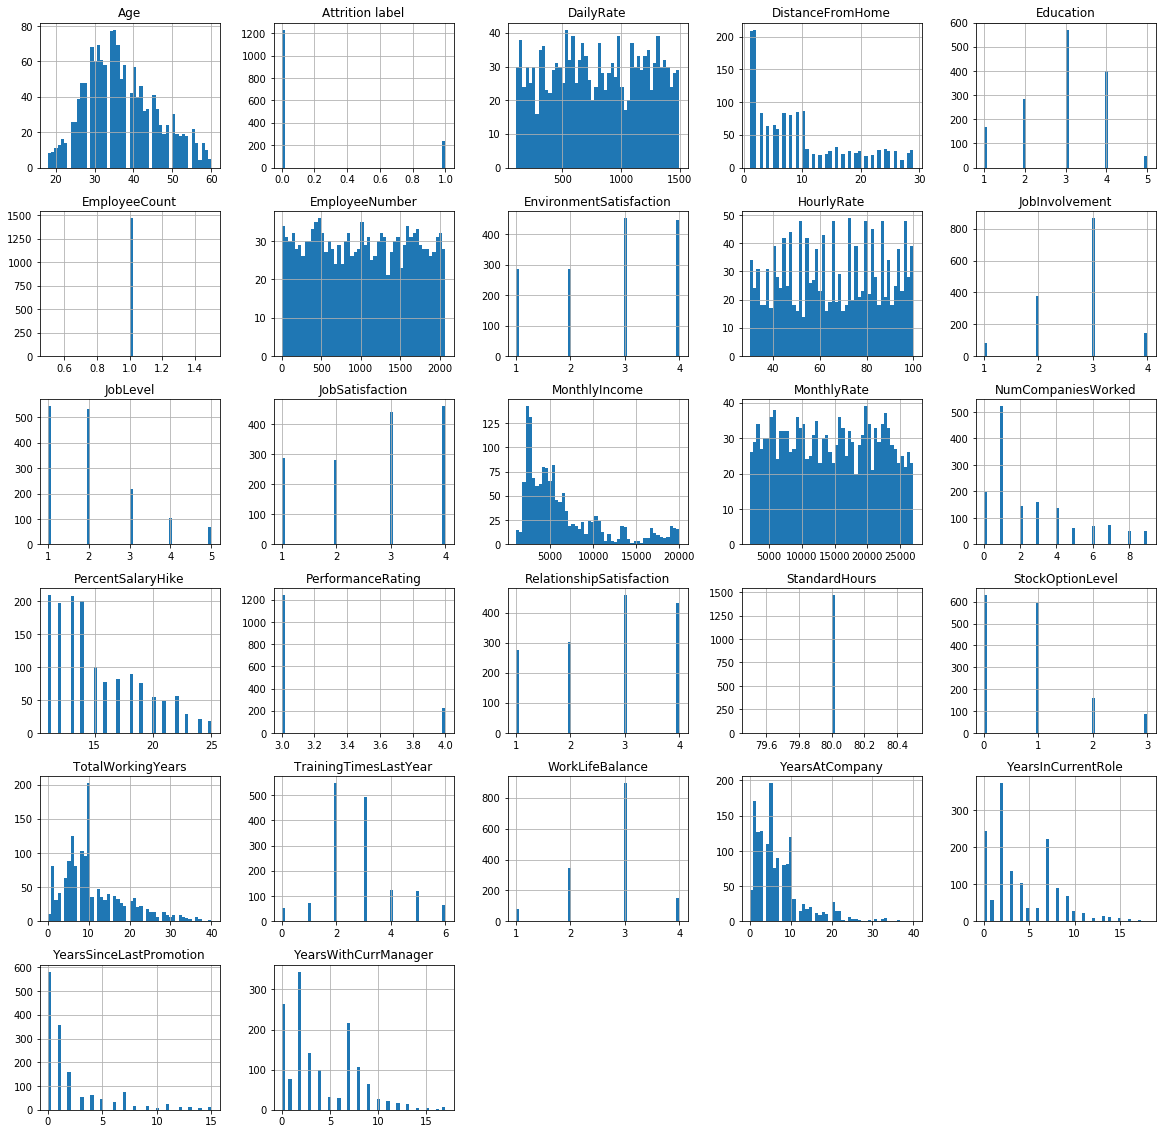

In [9]:
#let's plot the data using simple histogram to see the distribution of data.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

data_num.hist(figsize=(20,20), bins=50)
plt.show()

Well, there are a lot of features whose values seems to be grouped together into integer buckets, like 1, 2, 3, 4.., instead of real values. Rest of the features have different scales, although distribution is not that much of uneven.

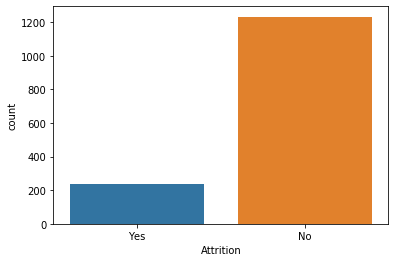

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [10]:
import seaborn as sns
sns.countplot(original_data['Attrition'])
plt.show()
original_data['Attrition'].value_counts()/original_data['Attrition'].shape[-1]

The labels seems to be more or less skewed. No problem we will balance the data. 

Creating a Test Set

In [11]:
from sklearn.model_selection import train_test_split
data, test_data = train_test_split(original_data, test_size=0.2, random_state=42) 

In [12]:
#let's have a look at the categorical data
data.select_dtypes(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
1097,Travel_Rarely,Research & Development,Technical Degree,Male,Laboratory Technician,Divorced,Y,No,No
727,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Single,Y,No,No
254,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,Y,No,No
1175,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Married,Y,No,No
1341,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,Y,No,No
...,...,...,...,...,...,...,...,...,...
1130,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Y,No,No
1294,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No,No
860,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,Yes,Yes
1459,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Married,Y,Yes,No


In [13]:
3 + 3 + 6 + 2 + 9 + 3+  2
# data['Education'].value_counts()

28

In [14]:
#So basically this column is useless since this has no variation, we'll get rid of it.
data['Over18'].value_counts()

Y    1176
Name: Over18, dtype: int64

let's try to find some insights about the categorical features and their relation to Attrition of an employee

In [15]:
#from my own intuition, "OverTime" can affect the employee satisfaction with his job. Let's check this column
print(data['OverTime'].value_counts())

#finding no. of overtime and non-overtime workers
overtime_workers = data[data['OverTime'] == 'Yes']
non_overtime_workers = data[data['OverTime'] == 'No']

#finding overtime workers Attrition, Age wise
left_overtime_workers = overtime_workers[overtime_workers["Attrition"] == 'Yes'].Age
retained_overtime_workers = overtime_workers[overtime_workers["Attrition"] == 'No'].Age

No     837
Yes    339
Name: OverTime, dtype: int64


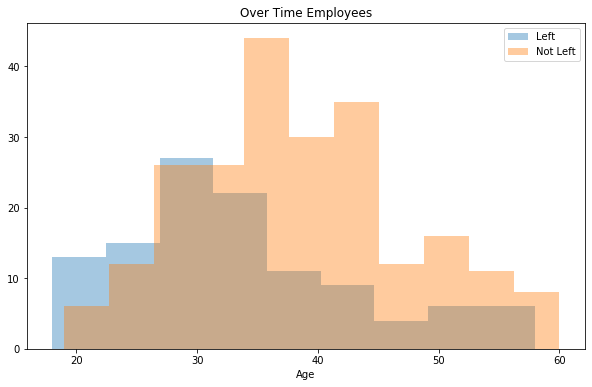

In [16]:
# f, ax = plt.subplots(1, 2, figsize=(10, 4))

#plot for overtime workers - Left and not left
plt.figure(figsize=(10,6))
sns.distplot(left_overtime_workers, label='Left', kde=False)
sns.distplot(retained_overtime_workers, label='Not Left', kde=False)
plt.legend()
plt.title('Over Time Employees')

plt.show()
#plot for non-overtime workers

> Well, As I could see, when it comes to "OverTime", employees who are young enough tend to leave the job more often than those who are in the mid of their career. More Specifically, Employees of age between 18-28 are less ratainable if they are made to work overtime, 28-38 age group are more or less similar(overlapping) and then people above 36 shows a sudden decline in Attrition.
> We can possibly make three age buckets in place of Age column. Let's see just Age and Attrition more closely.

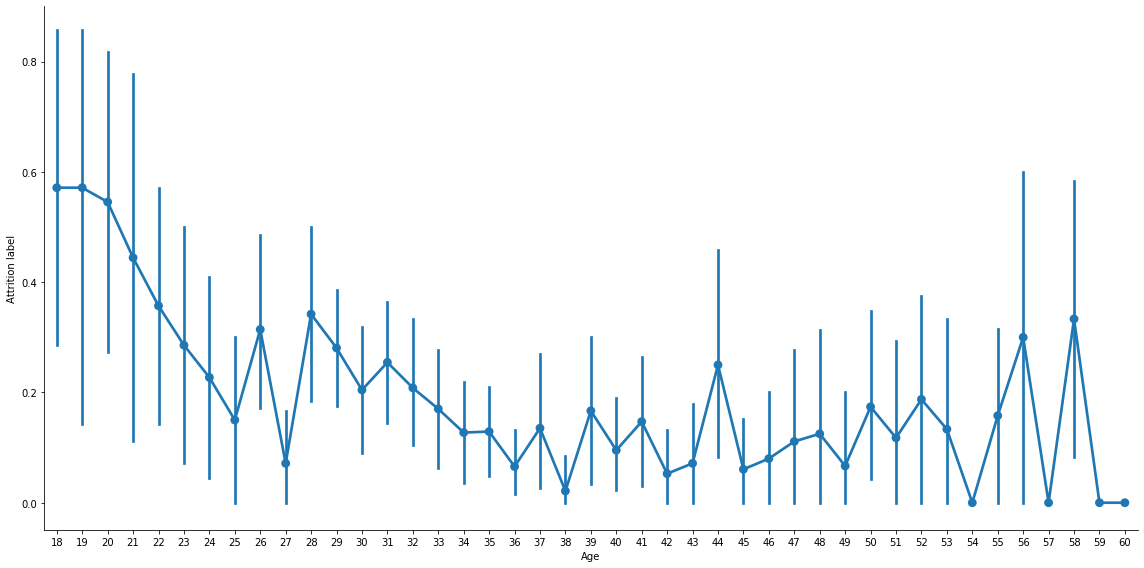

In [17]:
def plot_cat_relation(var1, var2, plot_kind, height):
    sns.catplot(var1, var2 , data=data, kind= plot_kind , aspect = 2, height = height)
    plt.show()
    
plot_cat_relation('Age', 'Attrition label', 'point', 8)

> We were right, see that the younger people have higher attrition rate than the mid age people. I can probably make a few age groups here. Like 18-21 when they makes quite frequent switchs. 22-33 can be grouped since they seem similar except a few outliers. 33 above and until 48 also have similar level of attrition more or less, and then above 48 have a little higher.

> Notice, that at the end of the career, it's highly fluctuating because they are close to retirement, which depends on company to company.

In [18]:
#let's find the correlation
num_corr = data_num.corr()
num_corr['Attrition label'].sort_values(ascending=False)

Attrition label             1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

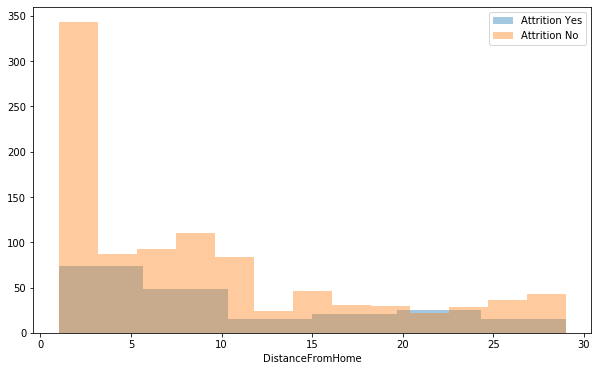

In [19]:
#Distance from home shows a positive correlation, let see it
def plot_relation(feature1, feature2, kde):
    plt.figure(figsize=(10,6))
    if kde==1:
        sns.distplot(feature1, label='Attrition Yes', kde=True)
        sns.distplot(feature2, label='Attrition No', kde= True)
    else:
        sns.distplot(feature1, label='Attrition Yes', kde=False)
        sns.distplot(feature2, label='Attrition No', kde= False)
    plt.legend()
    plt.show()
   
plot_relation(data[data['Attrition'] == 'Yes'].DistanceFromHome, data[data['Attrition'] == 'No'].DistanceFromHome, kde=0)

It's clear that distance from home also influence the attrition rate. People living far away tend to leave the company more often than those living less far away or put simply, As distance increases, people 'not leaving' the company decreases. 

In [20]:
#lets see what is employee number for a moment
data['EmployeeNumber'].head(10)

1097    1551
727     1012
254      349
1175    1654
1341    1881
1347    1890
983     1383
759     1049
86       113
1394    1966
Name: EmployeeNumber, dtype: int64

I cannot get an idea about Employee number, indeed it seems to me more like a serial no. in increasing order, 
also its correlation index is also very close to 0, means it seems to have least correlation with the attrition chances. 
We will drop such features ahead when we will be doing data preprocessing.

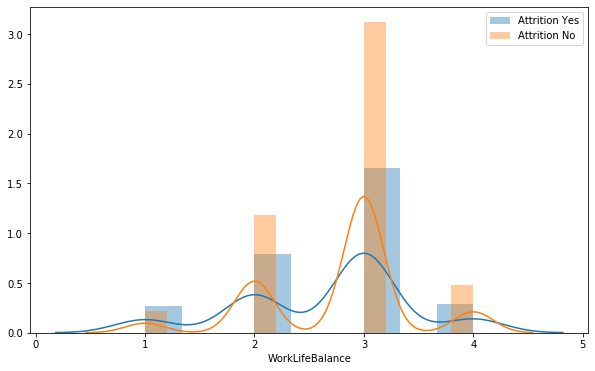

In [21]:
#Lets see work life balance as well
plot_relation(data[data['Attrition'] == 'Yes'].WorkLifeBalance, 
              data[data['Attrition'] == 'No'].WorkLifeBalance, kde=1)

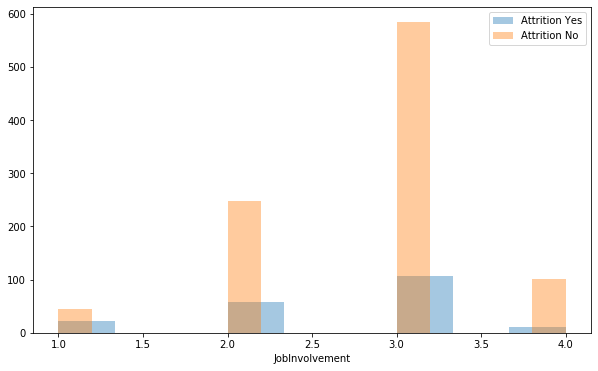

In [22]:
#Job involvement plot
plot_relation(data[data['Attrition'] == 'Yes'].JobInvolvement, 
              data[data['Attrition'] == 'No'].JobInvolvement, kde=0)

It seems that job involvement above 2 has very high ratio of people with No Attrition.

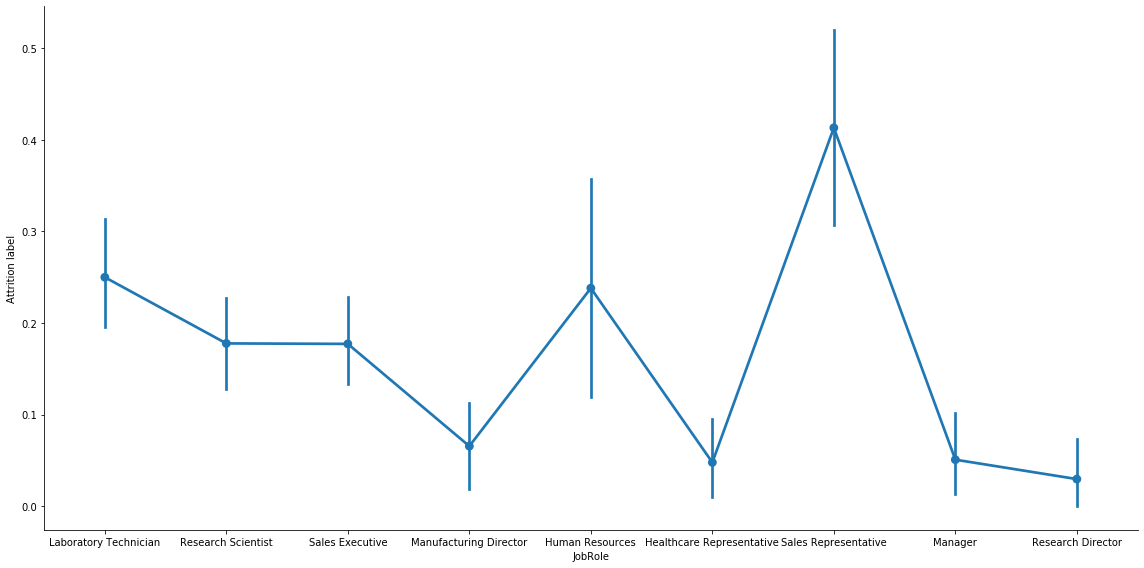

In [23]:
#plot for JobRole
plot_cat_relation('JobRole', 'Attrition label', 'point', 8)

So, The sales representative has a much higher attrition chances than others. Maybe we can create a category of Sales Representative if it would help, We'll see. 

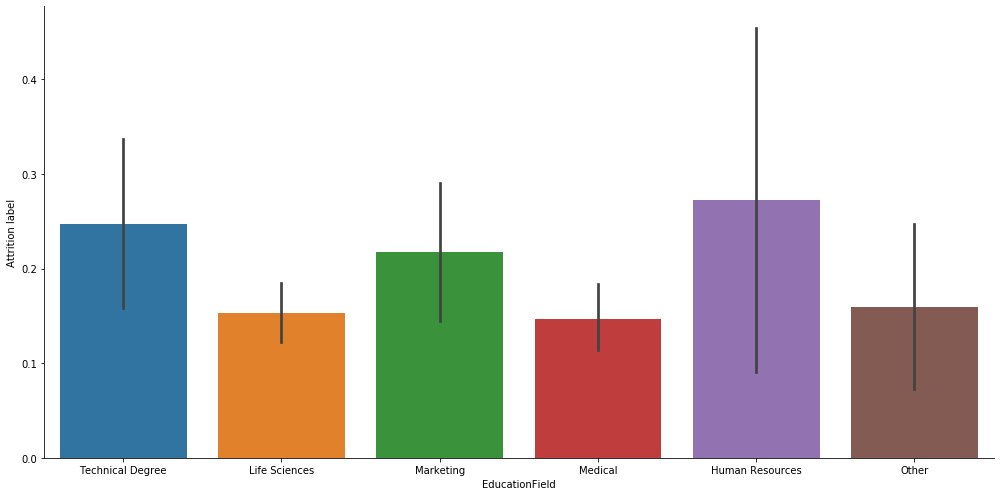

In [24]:
#lets see what other categorical features have got in for us.
plot_cat_relation('EducationField', 'Attrition label', 'bar', 7)

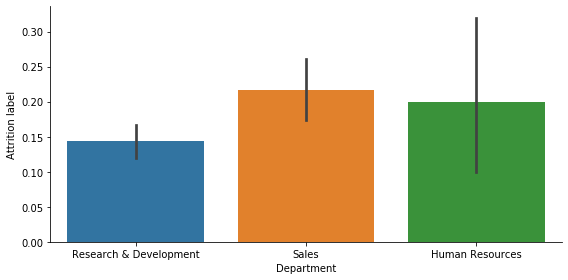

Research & Development    765
Sales                     361
Human Resources            50
Name: Department, dtype: int64

In [25]:
#Department
plot_cat_relation('Department', 'Attrition label', 'bar', 4)
data['Department'].value_counts()

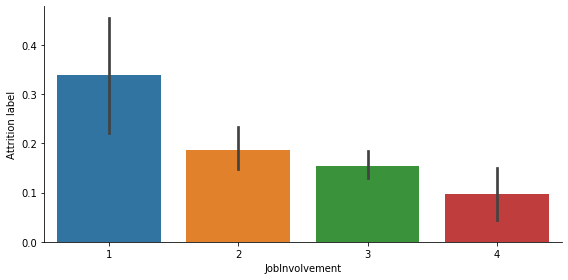

In [26]:
#JobInvolvement
plot_cat_relation('JobInvolvement', 'Attrition label', 'bar', 4)

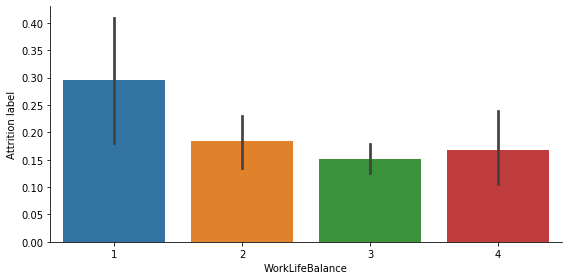

In [27]:
#WorkLifeBalance
plot_cat_relation('WorkLifeBalance', 'Attrition label', 'bar', 4)

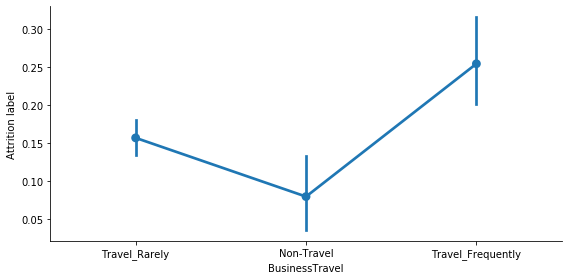

In [28]:
#BusinessTravel
plot_cat_relation('BusinessTravel', 'Attrition label', 'point', 4)

Business Travel doesn't seems to affect the Attrition Rate that much.

Let's get back to the numerical features now and try to find relations between them and categorical features. 

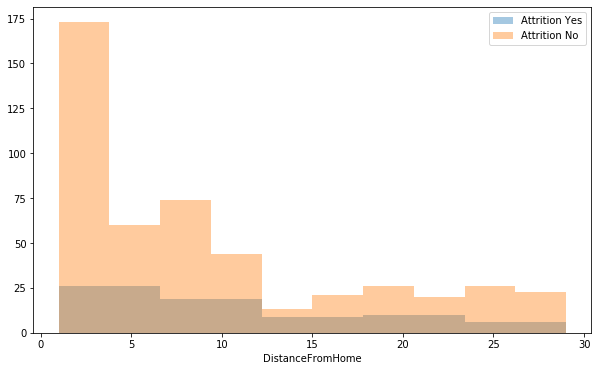

In [29]:
#Let's check out for Employees based on their Marital status and how far they travel to work. It would be interesting.
married_emp = data[data['MaritalStatus']=='Married']
single_emp = data[data['MaritalStatus']=='Single']

married_left = married_emp[married_emp['Attrition label']==1].DistanceFromHome
married_notleft = married_emp[married_emp['Attrition label']==0].DistanceFromHome

single_left = single_emp[single_emp['Attrition label']==1].DistanceFromHome
single_notleft = single_emp[single_emp['Attrition label']==0].DistanceFromHome

#plot for Married employees
plot_relation(married_left, married_notleft, kde=0)

Atleast upto distance 10, the attrition rate is quite low, after 10 the difference between no. of people leaving the job and those not leaving becomes less. Remember, this data only represents people who are married. So we can say, distance matters for people who are married.
Let's check the distribution for unmarried employees.

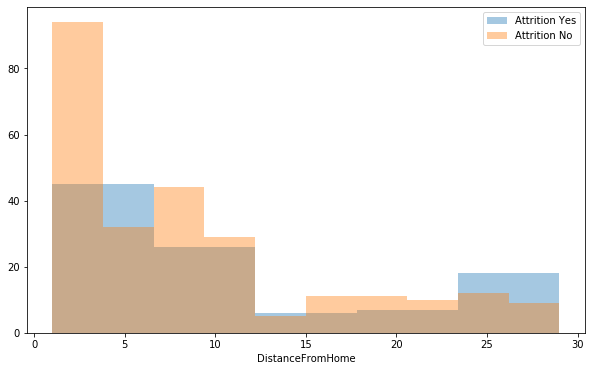

In [30]:
#plot for Single employees.
plot_relation(single_left, single_notleft, kde=0)

Here for Single employees, we see that Attrition after distance 10 is more or less overlapping.
What I can conclude is that there aren't too many people coming from far away, also they don't tend to have a large difference in their attrition. What certainly can be seen clearly is that people who live nearby with distance less than 10, and are married have extremely less attrition rate than any other combination. May be we can separate such group of people.

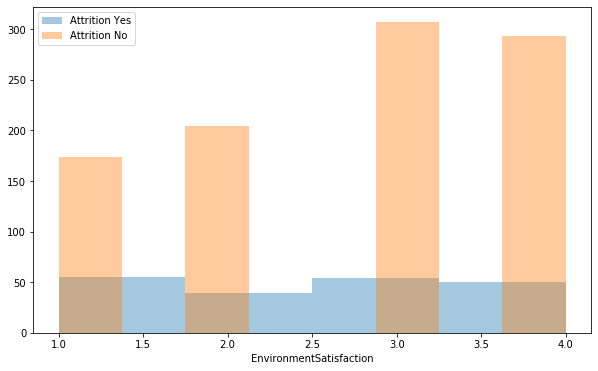

In [31]:
#I am sure rest of the features would also give me a little more insights about the data, lets check them as well
plot_relation(data[data['Attrition'] == 'Yes'].EnvironmentSatisfaction, 
              data[data['Attrition'] == 'No'].EnvironmentSatisfaction, kde=0)

In [32]:
#As Environment Satisfaction goes up the Non-Attrition goes up, particularly after 2.5.

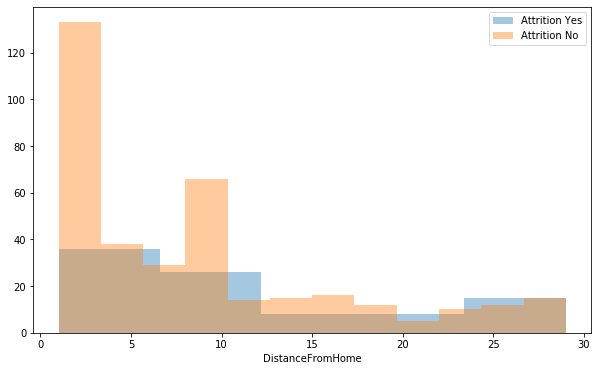

In [33]:
#I am willing to see one more combination of feature. Let's see Attrition for those employees who live far away
#and also have least job satisfaction compared to others.
low_job_satis = data[data['JobSatisfaction'] <= 2]
high_job_satis = data[data['JobSatisfaction'] > 2]

low_job_satis_left = low_job_satis[low_job_satis['Attrition label']==1].DistanceFromHome
low_job_satis_notleft = low_job_satis[low_job_satis['Attrition label']==0].DistanceFromHome

high_job_satis_left = high_job_satis[high_job_satis['Attrition label']==1].DistanceFromHome
high_job_satis_notleft = high_job_satis[high_job_satis['Attrition label']==0].DistanceFromHome

plot_relation(low_job_satis_left, low_job_satis_notleft, kde=0)

Employee who have low job satisfaction, have comparable attrition rate and make decisions based on distance from home
lets check for employee with high job satisfaction.

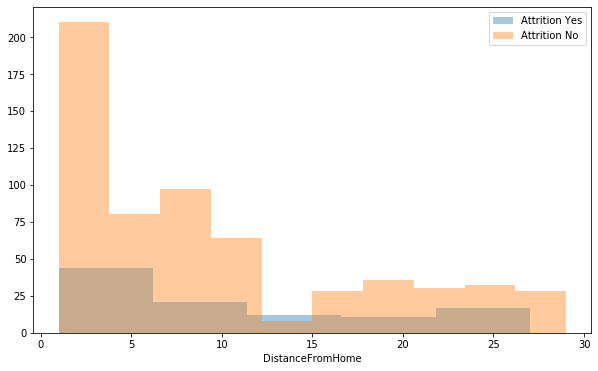

In [34]:
#plot for higher job satisfaction people's Attrition rate spread out on their DistanceFromHome at X-axis.
plot_relation(high_job_satis_left, high_job_satis_notleft, kde=0)

We see it clearly, people with higher job satisfaction tends to have less Attrition rate, even those living far. 
We also see that be it any case, people living near by have very less chances of Attrition. 

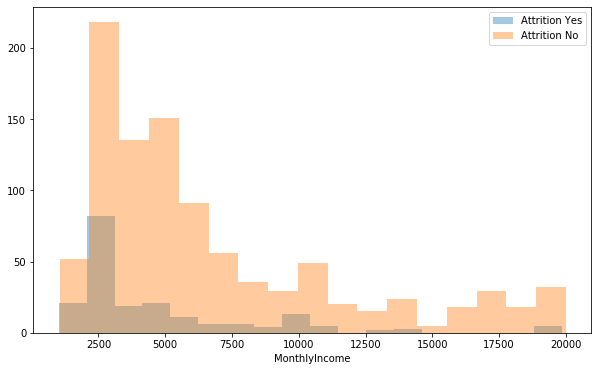

In [35]:
#lets now check them on the basis of salary.
salary_left = data[data['Attrition label']==1].MonthlyIncome
salary_not_left = data[data['Attrition label']==0].MonthlyIncome

plot_relation(salary_left, salary_not_left, kde=0)

People with income larger than 10000 have nearly neglible Attrition rate, I would rather group the employees within these two
income categories.

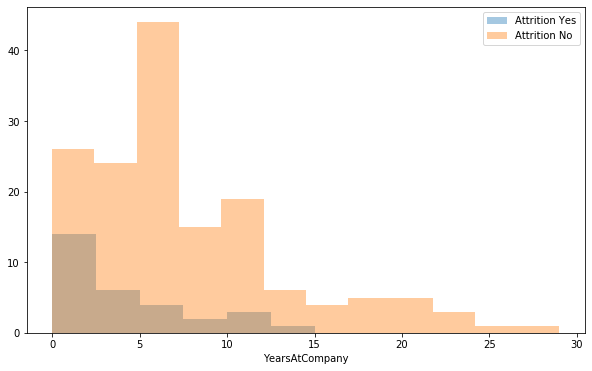

In [36]:
#Lets see if 'YearsAtCompany' and 'PercentSalaryHike' influence the Attrition chances of an employee.
more_increment_left = data[(data["PercentSalaryHike"] >= 20 ) & (data['Attrition label']==1)].YearsAtCompany
more_increment_not_left = data[(data["PercentSalaryHike"] >= 20) & (data['Attrition label']==0)].YearsAtCompany
plot_relation(more_increment_left, more_increment_not_left, kde=0)

So, I got something here, employees who have worked more than 15 years at the company but given good hike in salary(>=20%) tend
to stay in the company, note that the Attrition is absolutely nothing there.

## Feature Engineering

I would stop myself here with the EDA part, actually it is not the limit, but someone can go forward with more depth insights of the data and features, distributions of individual and combination of features. Let's now create some new features based on what we have got till now.
Well, we will try to meddle with the features based on some insights that we have got in our EDA part.
I would also make a few new features combining the existing ones wherever it would seem logical to me.

In [37]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. I wanted to create age buckets, let's create the buckets. 
def AgeBucketing(X):
    X.loc[X.Age <= 21, 'AgeBucket'] = 1
    X.loc[(X.Age > 21) & (X.Age <= 33), 'AgeBucket'] = 2
    X.loc[(X.Age > 33) & (X.Age <= 48), 'AgeBucket'] = 3
    X.loc[X.Age > 48, 'AgeBucket'] = 4
    X["AgeBucket"] = X['AgeBucket'].astype('int64', copy=True)

# 2. JobInvolvement more than 2 and less than equals to 2
def JobInvolvementGroup(X):
    X['JI'] = X["JobInvolvement"].mask(X['JobInvolvement'] <= 2, 1 )
    X['JI'] = X["JI"].mask(X['JobInvolvement'] >= 3, 2 )
    
# 3. Separating SalesRepresentative as a feature
def isSalesRep(X):
    X.loc[X.JobRole == 'Sales Representative' , 'SalesRep'] = 1
    X['SalesRep'] = X['SalesRep'].where(X['SalesRep'] == 1, 0)
    X["SalesRep"] = X['SalesRep'].astype('int64', copy=True)
    
# 4. EnvironmentSatisfaction more than 2 and less than equals to 2
def EnvironmentSatisfaction(X):
    X['ES'] = X["EnvironmentSatisfaction"].mask(X['EnvironmentSatisfaction'] <= 2, 1 )
    X['ES'] = X["ES"].mask(X['EnvironmentSatisfaction'] >= 3, 2 )
    
# 5. Salary greater than and less than 10000
def SalaryBucket(X):
    X.loc[X.MonthlyIncome <= 10000, 'SalaryBucket'] = 1
    X.loc[X.MonthlyIncome > 10000, 'SalaryBucket'] = 2
    X["SalaryBucket"] = X['SalaryBucket'].astype('int64', copy=True)

# 6. Married and Distance 
def MarriedLongDist(X):
    X.loc[(X.MaritalStatus == 'Married') & (X.DistanceFromHome >= 10), 'MarriedLongDist'] = 1
    X['MarriedLongDist'].fillna(0, inplace=True)
    X["MarriedLongDist"] = X['MarriedLongDist'].astype('int64', copy=True)
    
# 7. Long Years and Good Hike
def LongYearsGoodHike(X):
    X.loc[(X.YearsAtCompany > 15) & (X.PercentSalaryHike >= 20), 'LongYearsGoodHike'] = 1
    X['LongYearsGoodHike'].fillna(0, inplace=True)
    X["LongYearsGoodHike"] = X['LongYearsGoodHike'].astype('int64', copy=True)
    
# 8. mean
def satisfactionMean(X):
    X['JobSatisf_mean'] = (X['JobSatisfaction'] + X['JobInvolvement']) / 2
    
# 9. Stability
def stability(X):
    X['Stability'] = X['YearsInCurrentRole'] / X['YearsAtCompany']
    X['Stability'].fillna((X['Stability'].mean()), inplace=True)

# 10. Rate
def RateMean(X):
    X['Hrate_Mrate'] = X['HourlyRate'] / X['MonthlyRate']

In [38]:
#columns to delete after feature addition
cols_to_del = ['Age', 'JobInvolvement', 'EnvironmentSatisfaction', 'MonthlyIncome', 'HourlyRate',
                           'MonthlyRate', 'YearsInCurrentRole', 'YearsAtCompany']

So, I have added about 10 new features, while I am not sure about each one of them I am gonna try them and we'll see if we kind of dont want any of these features ahead actually. 

In [39]:
#I will make a custom transformer to add these features, trust me it's very handy
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, doAllTransform):
        self.doAllTransform= doAllTransform
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.doAllTransform:
            AgeBucketing(X)
            JobInvolvementGroup(X)
            EnvironmentSatisfaction(X)
            SalaryBucket(X)
            LongYearsGoodHike(X)
            satisfactionMean(X)
            stability(X)
            RateMean(X)
            X.drop(columns= cols_to_del , inplace=True)
            return X
        else:
            AgeBucketing(X)
            SalaryBucket(X)
            LongYearsGoodHike(X)
            satisfactionMean(X)
            stability(X)
            RateMean(X)
            return X          

#I am making a separate Transformer for running functions which contains use of both numerical and Categorical features.
class FeatureEngineering2(BaseEstimator, TransformerMixin):
    def __init__(self, doTransform=True):
        self.doTransform= doTransform
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.doTransform:
            isSalesRep(X)
            MarriedLongDist(X)
            X.drop(columns=['MaritalStatus', 'JobRole', 'DistanceFromHome'], inplace=True)
            return X
        else:
            return X
            

## Data Preprocessing

Okay so we have made our custom transformer, Now I will create a pipeline, actually two pipelines, since we have to process 
categorical and numerical features separately.

In [40]:
#lets first delete irrelavent features which gave no meaning
data = data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'])
data = data.drop(columns='Attrition label') #deleting our numerical version of label
X_train = data.drop(columns='Attrition')
y_train = data['Attrition']

In [41]:
cat_columns = list(X_train.select_dtypes(include= 'object').columns)
num_columns = list(X_train.select_dtypes(include= 'int64').columns) + list(X_train.select_dtypes(include= 'float').columns)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('FeatureEngg', FeatureEngineering(doAllTransform= True)),
    ('impute', SimpleImputer(strategy= 'median')),  #just to be out of risk of any NaN value popping in our data
    ('scale', StandardScaler()),
])

In [43]:
commonData_pipeline = Pipeline([
    ('FeatureEngg2', FeatureEngineering2(doTransform= True)),
])

In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('cat_impute', SimpleImputer(strategy= 'most_frequent')),
    ('cat_encode', OneHotEncoder(sparse = False)),
])

In [45]:
#combining both operations
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num_transform', num_pipeline, num_columns),
    ('common_transform', commonData_pipeline, ['MaritalStatus', 'JobRole', 'DistanceFromHome']),
    ('cat_transform', cat_pipeline, cat_columns),
])

In [46]:
final_train_data = full_pipeline.fit_transform(X_train)
final_train_data.shape

(1176, 54)

In [47]:
cat = full_pipeline.named_transformers_['cat_transform']
ohe = cat.named_steps.cat_encode

In [48]:
ohe_features = []
for i in ohe.categories_:
    for j in i:
        ohe_features.append(j)

In [65]:
a = num_columns + ['AgeBucket','JI','ES','SalaryBucket',
                'LongYearsGoodHike','JobSatisf_mean','Stability','Hrate_Mrate']
for i in cols_to_del:
    a.remove(i)
# b = list(set(a) - set(cols_to_del))
c = a + ['SalesRep', 'MarriedLongDist'] + ohe_features
len(c)

54

In [68]:
X = pd.DataFrame(final_train_data, columns= c)

In [69]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum>=0.95) + 1
d

29

In [70]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [78]:
X_reduced.shape

(1176, 29)